In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white', context='notebook', palette='Set2')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
games = pd.read_csv("../dataset/online-data/games.csv")
units = pd.read_csv("../dataset/online-data/units.csv")
orders = pd.read_csv("../dataset/online-data/orders.csv")
turns = pd.read_csv("../dataset/online-data/turns.csv")
players = pd.read_csv("../dataset/online-data/players.csv")

## データセットの確認
https://data.world/maxstrange/diplomacyboardgame

In [3]:
games.head()

,id,num_turns,num_players
0,37317,166,7
1,37604,51,7
2,39337,101,7
3,40541,46,7
4,44755,96,7


In [4]:
players.head()

,game_id,country,won,num_supply_centers,eliminated,start_turn,end_turn
0,114417,E,0,0,0,1,7
1,114417,F,0,9,0,1,21
2,114417,I,0,0,0,1,7
3,114417,G,0,4,0,1,17
4,114417,A,1,11,0,1,21


In [5]:
units.head()

,game_id,country,type,start_turn,end_turn,unit_id
0,114417,E,F,0,7,0
1,114417,E,A,0,10,1
2,114417,E,F,0,13,2
3,114417,F,A,0,21,3
4,114417,F,A,0,21,4


In [6]:
turns.head()

,game_id,turn_num,phase,year,season,scs_england,scs_france,scs_italy,scs_russia,scs_turkey,scs_germany,scs_austria
0,114417,0,Winter,1900,Winter,3,3,3,4,3,3,3
1,114417,1,Orders,1901,Spring,3,3,3,4,3,3,3
2,114417,2,Orders,1901,Fall,3,3,3,4,3,3,3
3,114417,3,Build,1901,Fall,4,6,4,6,4,4,5
4,114417,4,Orders,1902,Spring,4,6,4,6,4,4,5


In [8]:
orders.head()

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num
0,114417,0,MOVE,Edinburgh,Norwegian Sea,NaN,1,NaN,1
1,114417,1,MOVE,Liverpool,Yorkshire,NaN,1,NaN,1
2,114417,2,MOVE,London,North Sea,NaN,1,NaN,1
3,114417,3,MOVE,Marseilles,Spain,NaN,1,NaN,1
4,114417,4,MOVE,Paris,Picardy,NaN,1,NaN,1


## データ分析
### gameの外観

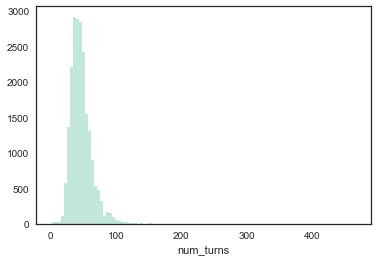

In [20]:
# turn数
x = games['num_turns']
sns.distplot(x, kde=False, rug=False, bins=100)

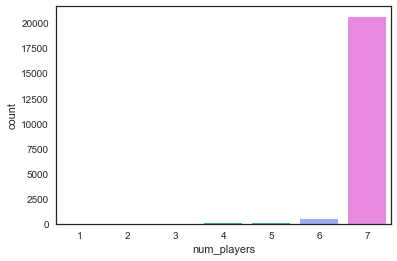

In [24]:
# プレイヤー数
sns.countplot(x="num_players", data = games)

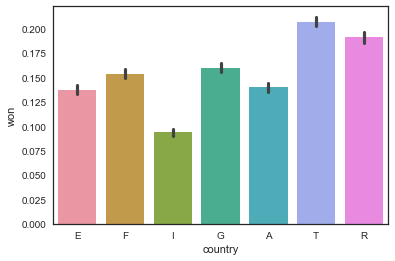

In [11]:
# 国ごとの勝率比較
sns.barplot(x="country", y="won", data = players)

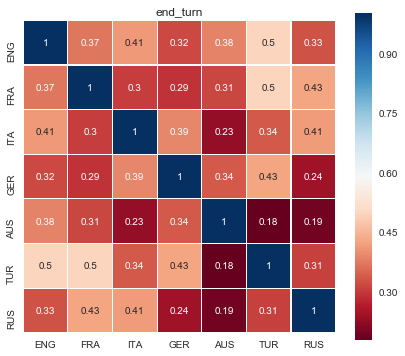

In [19]:
# 国と終了ターンの相関
correlation_matrix = np.corrcoef([players[(players["country"] == "E")]["end_turn"],
           players[(players["country"] == "F")]["end_turn"],
           players[(players["country"] == "I")]["end_turn"],
           players[(players["country"] == "G")]["end_turn"],
           players[(players["country"] == "A")]["end_turn"],
           players[(players["country"] == "T")]["end_turn"],
           players[(players["country"] == "R")]["end_turn"]])
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix = correlation_matrix.rename(columns={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"},
                                              index={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"})

plt.figure(figsize=(7,6))
plt.title("end_turn")
sns.heatmap(correlation_matrix, annot=True, linewidths=0.1, square=True, cmap="RdBu")

### 補給地

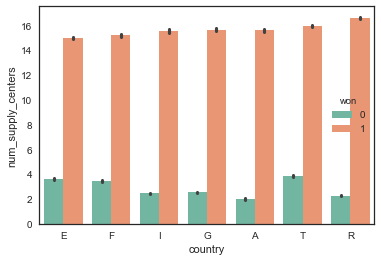

In [12]:
# 国ごとの補給地の数（平均, 勝ち負け別）
sns.barplot(x="country", y="num_supply_centers", hue="won", data = players)

#### 国と補給地数の相関を調べる

In [44]:
# merge dataset
dataset = pd.merge(orders, units, on=['game_id', 'unit_id'])
dataset = pd.merge(dataset, players, on=['game_id', 'country'])
dataset = pd.merge(dataset, turns, on=['game_id', 'turn_num'])

In [47]:
dataset.head()

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num,country,...,phase,year,season,scs_england,scs_france,scs_italy,scs_russia,scs_turkey,scs_germany,scs_austria
0,114417,0,MOVE,Edinburgh,Norwegian Sea,NaN,1,NaN,1,E,...,Orders,1901,Spring,3,3,3,4,3,3,3
1,114417,1,MOVE,Liverpool,Yorkshire,NaN,1,NaN,1,E,...,Orders,1901,Spring,3,3,3,4,3,3,3
2,114417,2,MOVE,London,North Sea,NaN,1,NaN,1,E,...,Orders,1901,Spring,3,3,3,4,3,3,3
3,114417,3,MOVE,Marseilles,Spain,NaN,1,NaN,1,F,...,Orders,1901,Spring,3,3,3,4,3,3,3
4,114417,4,MOVE,Paris,Picardy,NaN,1,NaN,1,F,...,Orders,1901,Spring,3,3,3,4,3,3,3


In [54]:
eng_dataset = dataset[(dataset['country']=='E') & (dataset['won']==1)]

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num,country,...,phase,year,season,scs_england,scs_france,scs_italy,scs_russia,scs_turkey,scs_germany,scs_austria
1495,120506,0,MOVE,Edinburgh,North Sea,NaN,1,NaN,1,E,...,Orders,1901,Spring,3,3,3,4,3,3,3
1496,120506,1,MOVE,Liverpool,Wales,NaN,1,NaN,1,E,...,Orders,1901,Spring,3,3,3,4,3,3,3
1497,120506,2,MOVE,London,English Channel,NaN,1,NaN,1,E,...,Orders,1901,Spring,3,3,3,4,3,3,3
1517,120506,0,MOVE,North Sea,Norway,NaN,1,NaN,2,E,...,Orders,1901,Fall,3,3,3,4,3,3,3
1518,120506,1,MOVE,Wales,Brest,NaN,1,NaN,2,E,...,Orders,1901,Fall,3,3,3,4,3,3,3


In [55]:
scs_num = []
dict_country = {}
scs = ["scs_england","scs_france", "scs_italy", "scs_russia", "scs_turkey", "scs_germany", "scs_austria"]

i=0
for s1 in scs:
    for s2 in scs:
        scs_num.append(eng_dataset[s1] * eng_dataset[s2])
        dict_country[i] = s1[4:7] + s2[4:7]
        i += 1

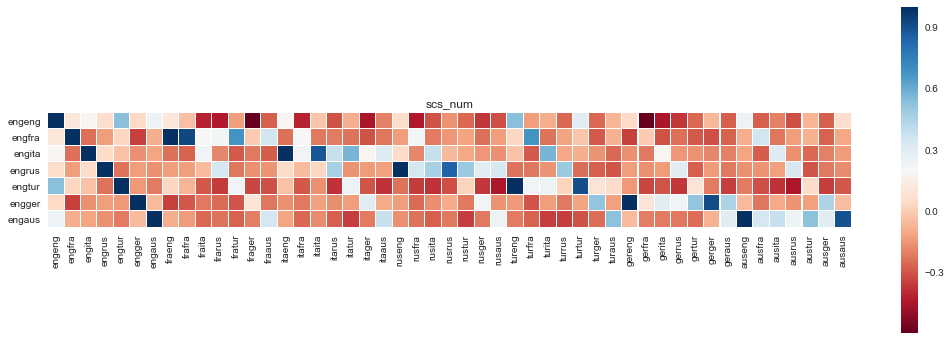

In [58]:
# 補給地の数の相関，年毎
correlation_matrix = np.corrcoef(scs_num)
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix = correlation_matrix.rename(columns=dict_country,
                                          index=dict_country)
plt.figure(figsize=(18, 6))
plt.title("scs_num")
sns.heatmap(correlation_matrix[:7], linewidths=0.1, square=True, cmap="RdBu")

# for i in range(1901, 1920):
#     correlation_matrix = np.corrcoef([turns[(turns["year"] == i)]["scs_england"],
#            turns[(turns["year"] == i)]["scs_france"],
#            turns[(turns["year"] == i)]["scs_italy"],
#            turns[(turns["year"] == i)]["scs_russia"],
#            turns[(turns["year"] == i)]["scs_turkey"],
#            turns[(turns["year"] == i)]["scs_germany"],
#            turns[(turns["year"] == i)]["scs_austria"]])
#     correlation_matrix = pd.DataFrame(correlation_matrix)
#     correlation_matrix = correlation_matrix.rename(columns={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"},
#                                               index={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"})

### [wip] unit

#### MOVE

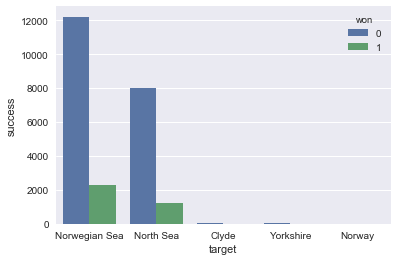

In [14]:
# Edinburghからの移動先
data = dataset[(dataset["year"]==1901)
               & (dataset["season"]=="Spring")
               & (dataset["success"]==1) 
               & (dataset["location"]=="Edinburgh") 
               & (dataset["unit_order"]=="MOVE")]
sns.barplot(x="target", y="success", data = data, hue="won", estimator=sum)

#### SUPPORT

In [8]:
dataset.size

447818280

## [wip] エージェントを作る
目的：評価関数を作りたい，年においてどの土地が重要であるか

- 案1：1905年，春の評価値を作りたい，場合，1905年に行った動作が重要とすれば良い
- 案2：場所と補給地の数からの情報で評価関数を作る

### 案1

### 案2